In [14]:
from utils import Song
import librosa
import numpy as np
import matplotlib.pyplot as plt
import json

In [11]:
beatles = Song('other.wav')
S = np.abs(librosa.stft(beatles.x, n_fft=4096))**2
chroma = librosa.feature.chroma_stft(S=S, sr=beatles.sample_rate)

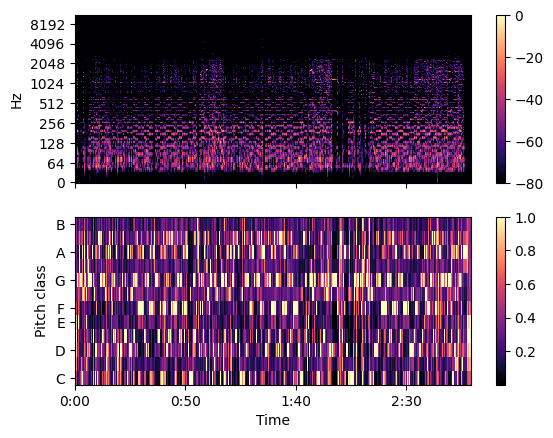

In [12]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].label_outer()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])

In [18]:
templates = json.load(open('chord_templates.json'))

In [22]:
N = len(templates.keys())
chord_matrix = np.zeros((N, 12))
for i, key in enumerate(templates.keys()):
    chord_matrix[i] = templates[key]
chord_matrix

array([[0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.,

In [24]:
chroma[:, 0]

array([0.5388333 , 0.8738329 , 0.9166826 , 1.        , 0.94181514,
       0.53188   , 0.40544936, 0.35912138, 0.27804503, 0.37747595,
       0.45244434, 0.4028786 ], dtype=float32)

In [27]:
def cossim(a, b):
    N = a.shape[0]
    out = np.zeros(N)
    for i in range(N):
        
        out[i] =  np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))

In [30]:
x = [[1, 2, 3],
     [3, 2, 1]]
y = [[1, 2, 3],
     [1, 2, 3]]
cossim(x, y)

ValueError: shapes (2,3) and (2,3) not aligned: 3 (dim 1) != 2 (dim 0)

In [31]:
np.tile(np.identity(2), (3, 1, 1))

array([[[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]]])